# `Data Science Project`

### 1. Get data

##### Retrieval
- Visit the link for the StreetEasy data: https://streeteasy.com/blog/download-data/
- Find the section entitled Other Rental Data – All Boroughs and the .zip file in the cell at row Median Asking Rent and column All Rentals
- Download the file. You can do this manually or programmatically
- Read the downloaded file into a DataFrame

##### Initial look and cleanliness check
- How big is the data set?
- Are there any duplicates?
- Is there any missing data?
- Any issues with data typing?
- Handle all issues and explain what you're doing

##### Wrangling
- What is the current index on the DataFrame? Do you like it?
- Would you create a different index and/or orientation for this DataFrame? Why or why not?
- If you have a different index in mind, go ahead and set it up

### 2. Analysis

##### Fact-finding

- Which Area saw the greatest increase in median rent between the start and end times there? (I will let you define "greatest")
- Which Borough had the highest average median rent (funny metric, right?) as of 2018-04?
- If you were to put together an "index" to describe each Borough through summarizing the median prices for each of its Areas, how would you do it?
- Create the Borough "index" using your preferred methodology

##### Exploration

- Plot a histogram of the median rents across all Areas for 2018-04
- Pick 3-5 Areas, for which there is data for the entire provided time period, and form a new table out of these
- Make a time-series plot of the median rents for these Areas
- Produce a table summary statistics for your selected Areas

##### Serialization

- Write your summary statistics table to an Excel spreadsheet
- Write the full table for your selected Areas to another sheet in the same spreadsheet
- Name the sheets appropriately
- Are there any other data formats that could be useful to write data to (no need to actually do anything)? Why?

### 3. Modeling

##### Rent prediction

- What type of model would you use to predict, for one of your selected Areas, its median rent for 2018-05? Why?
- What kind of pre-treatment might you perform to help set the stage for modeling? Why, or why might you not do anything?
- Go ahead and develop a model to predict that next median rent value. How are you training the model, and how are you evaluating its performance?
- Predict values for 2018-05. Now that you have that value, predict values for the following June and July as well.
- Visualize your predicted data. How does it look?
- Provide quantitative measures of performance

# -------------------------------------------------------------------------------------------

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()
import datetime as dt

# import statsmodels.api as sm
# from scipy import stats
# import statsmodels.formula.api as smf
# from sklearn import linear_model as lm

from sklearn.preprocessing import Imputer

# from indoorplants.analysis import exploratory

# --------------------------------------------------------------------------------------------

# 1. GET DATA

### Read the downloaded file into a DataFrame 

In [8]:
mar_df = pd.read_csv(os.path.join('medianAskingRent_All.csv'))

## INITIAL LOOK AND CLEANLINESS CHECK

## Explore how big the data set is by using `.shape`

In [9]:
mar_df.shape

(202, 110)

In [10]:
len(mar_df)

202

In [12]:
len([col for col in mar_df.columns])

110

- 202 rows x 110 columns

## Check for duplicates using `.duplicated`

In [13]:
dupes = mar_df.duplicated(keep=False)

In [14]:
[i for i in dupes if i==True]

[]

#### areaName is the column we care about in terms of duplicate entries

In [15]:
mar_df[mar_df['areaName'].duplicated()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11


- there are no duplicate rows

#### this checks if any COMPLETE rows are duplicated

In [16]:
mar_df[mar_df.duplicated()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11


#### other methods we can use to check for duplicates...

In [17]:
test_drop = mar_df.copy(deep=True)

In [18]:
print (len(mar_df))
print (len(test_drop.drop_duplicates()))

202
202


#### check for duplicate columns

In [19]:
[col for col in mar_df.columns if col[0] == col[1]]

[]

In [20]:
mar_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

#### we can set 'areaName' as index and check for duplicates

In [21]:
test_drop.set_index('areaName', inplace=True)

In [22]:
test_drop.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

- there are no duplicate rows or columns in the DataFrame

## Check for missing values

In [23]:
mar_df.info

<bound method DataFrame.info of                 areaName        Borough      areaType  2010-01  2010-02  \
0           All Downtown      Manhattan     submarket   3200.0   3200.0   
1            All Midtown      Manhattan     submarket   2895.0   2800.0   
2    All Upper East Side      Manhattan     submarket   2469.0   2450.0   
3    All Upper Manhattan      Manhattan     submarket   1825.0   1800.0   
4    All Upper West Side      Manhattan     submarket   2895.0   2800.0   
5             Alley Park         Queens  neighborhood      NaN      NaN   
6                Astoria         Queens  neighborhood   1600.0   1650.0   
7             Auburndale         Queens  neighborhood      NaN      NaN   
8             Bath Beach       Brooklyn  neighborhood      NaN      NaN   
9      Battery Park City      Manhattan  neighborhood   3495.0   3346.0   
10             Bay Ridge       Brooklyn  neighborhood   1350.0   1388.0   
11            Baychester          Bronx  neighborhood      NaN      

In [24]:
mar_df.iloc[[5]]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
mar_df.isnull().head(10)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
mar_df.isnull().sum().head(18)

areaName      0
Borough       1
areaType      0
2010-01     114
2010-02     114
2010-03     116
2010-04     115
2010-05     119
2010-06     120
2010-07     124
2010-08     122
2010-09     123
2010-10     118
2010-11     116
2010-12     114
2011-01     115
2011-02     110
2011-03     107
dtype: int64

In [27]:
len(mar_df[mar_df.isnull().any(axis=1)])

133

In [28]:
len(mar_df[mar_df.isnull().any(axis=1)]) / len(mar_df)

0.6584158415841584

- 133 areas (66%) have one or more months with NaN values / missing data 

In [29]:
print("The total number of rows is ", len(mar_df), 
      "\nThe total number of missing values is ", np.count_nonzero(mar_df.isnull()))

The total number of rows is  202 
The total number of missing values is  8891


In [30]:
for col in mar_df:
    print("In column", col, 
      "  \nThe number of missing values is ", np.count_nonzero(mar_df[col].isnull()))

In column areaName   
The number of missing values is  0
In column Borough   
The number of missing values is  1
In column areaType   
The number of missing values is  0
In column 2010-01   
The number of missing values is  114
In column 2010-02   
The number of missing values is  114
In column 2010-03   
The number of missing values is  116
In column 2010-04   
The number of missing values is  115
In column 2010-05   
The number of missing values is  119
In column 2010-06   
The number of missing values is  120
In column 2010-07   
The number of missing values is  124
In column 2010-08   
The number of missing values is  122
In column 2010-09   
The number of missing values is  123
In column 2010-10   
The number of missing values is  118
In column 2010-11   
The number of missing values is  116
In column 2010-12   
The number of missing values is  114
In column 2011-01   
The number of missing values is  115
In column 2011-02   
The number of missing values is  110
In column 2011-03 

## Dealing with missing values

##### read andrew gelman's paper on missingness (missing-data imputation)
<http://www.stat.columbia.edu/~gelman/arm/missing.pdf>

### we could use `.fillna` to fill or impute as seen below, but that would be wrong

In [31]:
nonan_df = mar_df.copy(deep=True)

In [32]:
nonan_df.fillna(0, inplace=True)

In [33]:
#nonan_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [34]:
#nonan_df.apply(lambda x: x.fillna(0), axis=0)

### similarly we could use sklearn `Imputer`

In [35]:
# Create an imputer object that looks for 'Nan' values, and replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Remove columns with object type
imputer_df = mar_df.copy(deep=True)
imputer_df.drop(['areaName', 'Borough', 'areaType'], axis=1, inplace=True)

# Train the imputer on the imputer_df dataset
mean_imputer = mean_imputer.fit(imputer_df)

# Apply the imputer to the imputer_df dataset
imputed_df = pd.DataFrame(mean_imputer.transform(imputer_df.values), columns=list(imputer_df.columns))

In [36]:
imputed_df.isnull().sum()

2010-01    0
2010-02    0
2010-03    0
2010-04    0
2010-05    0
2010-06    0
2010-07    0
2010-08    0
2010-09    0
2010-10    0
2010-11    0
2010-12    0
2011-01    0
2011-02    0
2011-03    0
2011-04    0
2011-05    0
2011-06    0
2011-07    0
2011-08    0
2011-09    0
2011-10    0
2011-11    0
2011-12    0
2012-01    0
2012-02    0
2012-03    0
2012-04    0
2012-05    0
2012-06    0
          ..
2016-06    0
2016-07    0
2016-08    0
2016-09    0
2016-10    0
2016-11    0
2016-12    0
2017-01    0
2017-02    0
2017-03    0
2017-04    0
2017-05    0
2017-06    0
2017-07    0
2017-08    0
2017-09    0
2017-10    0
2017-11    0
2017-12    0
2018-01    0
2018-02    0
2018-03    0
2018-04    0
2018-05    0
2018-06    0
2018-07    0
2018-08    0
2018-09    0
2018-10    0
2018-11    0
Length: 107, dtype: int64

#### Decision: leave missing values as is and deal with them when it comes to modelling
- There is no need to delete NaNs when performing vecotrized calculations by broadcasting across columns with pandas

## Check for issues with data types

In [37]:
mar_df.dtypes

areaName     object
Borough      object
areaType     object
2010-01     float64
2010-02     float64
2010-03     float64
2010-04     float64
2010-05     float64
2010-06     float64
2010-07     float64
2010-08     float64
2010-09     float64
2010-10     float64
2010-11     float64
2010-12     float64
2011-01     float64
2011-02     float64
2011-03     float64
2011-04     float64
2011-05     float64
2011-06     float64
2011-07     float64
2011-08     float64
2011-09     float64
2011-10     float64
2011-11     float64
2011-12     float64
2012-01     float64
2012-02     float64
2012-03     float64
             ...   
2016-06     float64
2016-07     float64
2016-08     float64
2016-09     float64
2016-10     float64
2016-11     float64
2016-12     float64
2017-01     float64
2017-02     float64
2017-03     float64
2017-04     float64
2017-05     float64
2017-06     float64
2017-07     float64
2017-08     float64
2017-09     float64
2017-10     float64
2017-11     float64
2017-12     float64


In [38]:
mar_df['areaName'][0]

'All Downtown'

In [39]:
mar_df['Borough'][0]

'Manhattan'

In [40]:
mar_df['areaType'][0]

'submarket'

In [41]:
mar_df['2010-01'][0]

3200.0

## SUMMARY OF DATA WRANGLING AND CLEANING

- there are no duplicate columns or rows
- there are missing values for multiple rows and columns, which we have chosen to leave as is for now
- there are no type issues: areaName, Borough and areaType are objects and date columns are floats

- Dropping all NaN's is not appropriate as it would be a shame to lose all the associated data with an entire time period, or area name e.g. NYC. Unless, of course, if an entire row or area is missing data in which case there is no point in keepin said data.
- In this context, I don't think that imputing the median asking rent by using the mean is appropriate, as areas differ so vastly that taking the mean in the metro NY area would be an inaccurate representation of the market
- Does it makes more sense to fill missing values with 0? - No
    - pandas allows you to keep NaNs and still boradcast calculations 
    - if you were to ever decide to fill NaNs with 0, nb to keep in mind that when it comes to future modelling and math calculations such as mean or % increase etc. the zeros will skew the true numbers or results

### Change index, drop columns, and transpose the DataFrame

- The following occurs below:
- I set the index to 'areaName' so that the dataframe could be transposed for easy calculation purposes across the columns
    - one thing to keep in mind when changing the index is that the 'areaName' becomes unavailable to utlize, though you can always reset the index if needed
- I dropped columns 'Borough' and 'areatType' as they don't sit right (different type objects) when the orientation is transposed, and they interfere with necessary calculations 
- I transposed the data in order to utilize numpy's `.min` and `.max` broadcast functions

# --------------------------------------------------------------------------------------------

# 2. ANALYSIS

## FACT-FINDING 

- As mentioned above, there is NO need to delete NaNs if performing vecotrized calculations by broadcasting across columns with pandas
- note to self: focus on the vectorization of the data or on changing the mindset from iteration to vectorization

## Which Area saw the greatest increase in median rent between the start and end times there?

In [42]:
t_df = mar_df.copy(deep=True)

In [43]:
t_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3750.0,3730.0,3750.0,3825.0,3800.0,3795.0,3800.0,3831.0,3800.0,3900.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3391.0,3450.0,3500.0,3505.0,3515.0,3500.0,3550.0,3587.0,3553.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2895.0,2850.0,2850.0,2850.0,2900.0,2950.0,2900.0,2895.0,2995.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2295.0,2300.0,2350.0,2395.0,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3290.0,3250.0,3290.0,3300.0,3350.0,3345.0,3328.0,3400.0,3400.0,3432.0
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0,2183.0
7,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2095.0,2095.0,1850.0,2098.0,2095.0,2000.0,1895.0,1945.0,1935.0
8,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0,1712.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4100.0,4050.0,4290.0,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0


In [44]:
t_df.set_index('areaName', inplace=True)

In [45]:
t_df.drop(['Borough', 'areaType'], axis=1, inplace=True)

In [46]:
t_df = t_df.T

In [47]:
t_df.head()

areaName,All Downtown,All Midtown,All Upper East Side,All Upper Manhattan,All Upper West Side,Alley Park,Astoria,Auburndale,Bath Beach,Battery Park City,...,West Village,Westchester Village,Whitestone,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside,Woodstock
2010-01,3200.0,2895.0,2469.0,1825.0,2895.0,NaN,1600.0,NaN,NaN,3495.0,...,3265.0,NaN,NaN,NaN,2500.0,1600.0,NaN,NaN,1813.0,NaN
2010-02,3200.0,2800.0,2450.0,1800.0,2800.0,NaN,1650.0,NaN,NaN,3346.0,...,3395.0,NaN,NaN,NaN,2500.0,1650.0,NaN,NaN,NaN,NaN
2010-03,3025.0,2800.0,2400.0,1795.0,2750.0,NaN,1620.0,NaN,NaN,3268.0,...,3113.0,NaN,NaN,NaN,2500.0,1650.0,NaN,NaN,1398.0,NaN
2010-04,3100.0,2850.0,2500.0,1800.0,2800.0,NaN,1600.0,NaN,NaN,3295.0,...,3250.0,NaN,NaN,NaN,2600.0,1600.0,NaN,NaN,2000.0,NaN
2010-05,3100.0,2900.0,2550.0,1823.0,2798.0,NaN,1700.0,NaN,NaN,3100.0,...,3073.0,NaN,NaN,NaN,2625.0,1800.0,NaN,NaN,1475.0,NaN


In [48]:
t_df.max().sort_values(ascending=False)

areaName
Central Park South     9500.0
Tribeca                8398.0
Soho                   7100.0
Little Italy           5200.0
Flatiron               5100.0
Battery Park City      5100.0
DUMBO                  5078.0
Stuyvesant Town/PCV    4710.0
Midtown                4500.0
Chelsea                4195.0
Boerum Hill            4150.0
Greenwich Village      4150.0
Manhattan Beach        4100.0
Hillcrest              4075.0
Midtown South          4050.0
Nolita                 3995.0
West Village           3995.0
Douglaston             3925.0
All Downtown           3900.0
Financial District     3900.0
Roosevelt Island       3828.0
Gramercy Park          3800.0
Carroll Gardens        3798.0
Cobble Hill            3700.0
Gowanus                3650.0
Ditmas Park            3625.0
All Midtown            3587.0
Upper West Side        3550.0
All Upper West Side    3550.0
Midtown West           3530.0
                        ...  
Alley Park                NaN
Baychester                NaN
B

In [49]:
t_df.min().sort_values(ascending=True)

areaName
Mott Haven                    763.0
Corona                        950.0
Woodstock                     988.0
Bedford Park                 1000.0
Elmhurst                     1050.0
Belmont                      1075.0
Sunset Park                  1075.0
East Flatbush                1075.0
Bath Beach                   1075.0
Fordham                      1075.0
East New York                1100.0
University Heights           1100.0
Concourse                    1100.0
Parkchester                  1100.0
Flatbush                     1100.0
Morrisania                   1123.0
Highbridge                   1125.0
East Tremont                 1136.0
Bensonhurst                  1138.0
Kingsbridge                  1150.0
Melrose                      1150.0
Borough Park                 1150.0
Staten Island                1175.0
Wakefield                    1200.0
Norwood                      1200.0
Prospect Lefferts Gardens    1200.0
Dyker Heights                1200.0
Prospect Park South

In [50]:
t_df.min().sort_values(ascending=True)[-1]

nan

In [51]:
max_increase = t_df.max() - t_df.min()

In [52]:
max_increase.sort_values(ascending=False)

areaName
Central Park South                 4600.0
Tribeca                            3448.0
Soho                               3258.0
Little Italy                       2701.0
Douglaston                         2425.0
DUMBO                              2278.0
Ditmas Park                        2125.0
Gowanus                            2050.0
Battery Park City                  2000.0
Stuyvesant Town/PCV                1807.0
Cobble Hill                        1800.0
Kew Gardens                        1746.0
Columbia St Waterfront District    1725.0
Hillcrest                          1725.0
Boerum Hill                        1687.0
Carroll Gardens                    1623.0
Mott Haven                         1604.0
Manhattan Beach                    1600.0
Flatiron                           1550.0
Roosevelt Island                   1515.0
Morningside Heights                1505.0
Red Hook                           1500.0
Nolita                             1495.0
Jamaica Estates          

- Central Park South saw the greatest increase in median rent between the start and end times there. (I defined "greatest" as the largest value returned from taking the max - min for each area)

##############################################################################################################################

## Pandas exploration

### set max and min series to frame, merge columns to mar_df, calculate diff column

In [53]:
xmax = t_df.max().to_frame(name='max')

In [54]:
xmax.reset_index(inplace=True)

In [55]:
xmin = t_df.min().to_frame(name='min')

In [56]:
xmin.reset_index(inplace=True)

In [57]:
print (len(xmax))
print (len(xmin))

202
202


### merge max_df and min_df

In [58]:
mar_df = mar_df.merge(xmax, on='areaName', how='left')

In [59]:
mar_df = mar_df.merge(xmin, on='areaName', how='left')

In [60]:
mar_df['diff'] = mar_df['max'] - mar_df['min']

In [61]:
mar_df.sort_values(by='diff', ascending=False, inplace=True)

In [62]:
mar_df.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0


In [63]:
mar_df[mar_df['diff'].notnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0
55,Ditmas Park,Brooklyn,neighborhood,1600.0,1850.0,1850.0,1500.0,NaN,NaN,2100.0,...,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0,3625.0,1500.0,2125.0
82,Gowanus,Brooklyn,neighborhood,NaN,1600.0,NaN,NaN,1800.0,NaN,NaN,...,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0,3650.0,1600.0,2050.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0,2000.0
177,Stuyvesant Town/PCV,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,2903.0,NaN,...,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0,4710.0,2903.0,1807.0


In [64]:
len(mar_df[mar_df['diff'].notnull()])

172

In [65]:
len(mar_df) - len(mar_df[mar_df['diff'].notnull()])

30

In [66]:
(len(mar_df) - len(mar_df[mar_df['diff'].notnull()])) / len(mar_df)

0.1485148514851485

- 30 areas (15%) are missing data for every month in the dataframe

-  the areas are:

In [67]:
mar_df[mar_df['diff'].isnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Bowne Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Brookville,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Cambria Heights,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,City Island,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Civic Center,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Clearview,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Co-op City,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Country Club,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
mar_df[~mar_df['diff'].notnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Baychester,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Bowne Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Brookville,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Cambria Heights,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,City Island,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Civic Center,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Clearview,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Co-op City,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Country Club,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
mar_df[mar_df.notnull()]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff
36,Central Park South,Manhattan,neighborhood,6000.0,6000.0,5500.0,6500.0,6500.0,5800.0,5650.0,...,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0,9500.0,4900.0,4600.0
183,Tribeca,Manhattan,neighborhood,6500.0,6773.0,6500.0,6400.0,6500.0,6500.0,6000.0,...,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0,8398.0,4950.0,3448.0
167,Soho,Manhattan,neighborhood,5200.0,5288.0,5275.0,4950.0,4197.0,4000.0,4000.0,...,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0,7100.0,3842.0,3258.0
105,Little Italy,Manhattan,neighborhood,3295.0,3050.0,3000.0,2999.0,2885.0,2600.0,3700.0,...,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0,5200.0,2499.0,2701.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1500.0,2425.0
54,DUMBO,Brooklyn,neighborhood,3275.0,3200.0,2800.0,2875.0,2800.0,2950.0,3400.0,...,4226.0,4500.0,4200.0,4785.0,4195.0,4795.0,5078.0,5078.0,2800.0,2278.0
55,Ditmas Park,Brooklyn,neighborhood,1600.0,1850.0,1850.0,1500.0,NaN,NaN,2100.0,...,1999.0,2073.0,2400.0,2400.0,2086.0,2000.0,1995.0,3625.0,1500.0,2125.0
82,Gowanus,Brooklyn,neighborhood,NaN,1600.0,NaN,NaN,1800.0,NaN,NaN,...,3230.0,3025.0,3200.0,3399.0,2765.0,2890.0,2883.0,3650.0,1600.0,2050.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4650.0,4525.0,4750.0,4877.0,5000.0,4945.0,4750.0,5100.0,3100.0,2000.0
177,Stuyvesant Town/PCV,Manhattan,neighborhood,NaN,NaN,NaN,NaN,NaN,2903.0,NaN,...,3818.0,3807.0,3822.0,3966.0,3750.0,4014.0,3722.0,4710.0,2903.0,1807.0


##############################################################################################################################

## Which Borough had the highest average median rent (funny metric, right?) as of 2018-04?

In [70]:
new_df = mar_df.copy(deep=True)

In [71]:
new_df.drop(['max', 'min', 'diff'], inplace=True, axis=1)

#### need to filter the dataframe to only includes dates from 2018-04 and onward 

In [72]:
list(new_df.columns)

['areaName',
 'Borough',
 'areaType',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '

In [73]:
new_df = new_df[['areaName',
 'Borough',
 'areaType',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11']]

In [74]:
new_df.head()

,areaName,Borough,areaType,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
36,Central Park South,Manhattan,neighborhood,7500.0,7100.0,7100.0,7820.0,7500.0,8250.0,7975.0,9500.0
183,Tribeca,Manhattan,neighborhood,6500.0,6300.0,6700.0,6598.0,7000.0,7286.0,6885.0,7038.0
167,Soho,Manhattan,neighborhood,5000.0,4995.0,4500.0,4997.0,5500.0,5500.0,5150.0,5500.0
105,Little Italy,Manhattan,neighborhood,3500.0,3087.0,2990.0,3000.0,2773.0,2700.0,3150.0,3198.0
56,Douglaston,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
new_df['sum'] = new_df.sum(axis=1)

In [76]:
new_df['count'] = new_df.count(axis=1, numeric_only=True)

In [77]:
new_df['avg_med'] = new_df['sum'] / new_df['count']

In [78]:
new_grouped = new_df.groupby(['Borough'])['avg_med'].mean()

In [79]:
new_grouped.sort_values(ascending=False)

Borough
Manhattan        3041.302401
Brooklyn         2017.932323
Staten Island    1705.444444
Queens           1141.733170
Bronx            1036.082106
Name: avg_med, dtype: float64

In [80]:
(new_grouped.sort_values(ascending=False)[0] - new_grouped.sort_values(ascending=False)[1] ) / new_grouped.sort_values(ascending=False)[1]

0.5071379581406595

- Manhattan had the highest average median rent amongst the five boroughs, 51% higher than the next highest borough

## If you were to put together an "index" to describe each Borough through summarizing the median prices for each of its Areas, how would you do it?


## Create the Borough "index" using your preferred methodology

Notes on this question: 

"Index" as a product, not database construct

Like the SP 500, a singular representation of lots of information

This particular question: represent all the pricing activity for each borough with its own index. The idea is, can you devise a number to use to represent the pricing activity for a given borough

In [81]:
med_df = mar_df.copy(deep=True)

In [82]:
med_df['med'] = med_df.median(axis=1)

In [83]:
boroughrollup_index = med_df.groupby(['Borough'])['med'].median()

In [84]:
boroughrollup_index

Borough
Bronx            1586.50
Brooklyn         2200.00
Manhattan        3262.25
Queens           1883.50
Staten Island    1829.00
Name: med, dtype: float64

## EXPLORATION

## Plot a histogram of the median rents across all Areas for 2018-04 

In [85]:
hist_df = mar_df.copy(deep=True)

In [86]:
hist_df = hist_df[['areaName', '2018-04']]

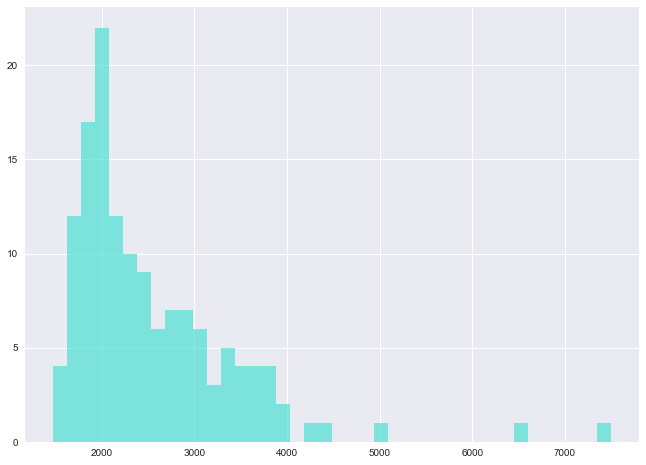

In [87]:
ax = hist_df['2018-04'].hist(figsize=(11,8), bins=40, color="turquoise", alpha=.65)

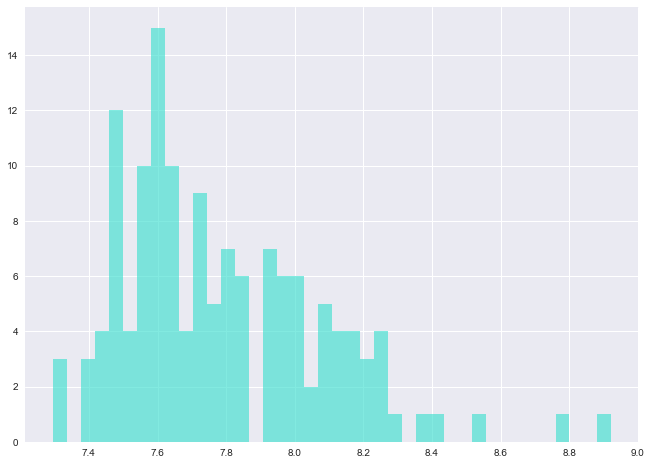

In [88]:
ax = hist_df['2018-04'].apply(np.log).hist(figsize=(11,8), bins=40, color="turquoise", alpha=.65)

## Pick 3-5 Areas, for which there is data for the entire provided time period, and form a new table out of these

In [89]:
full_data = mar_df[~mar_df.isnull().any(axis=1)].copy().head(5)

In [90]:
full_data[full_data.isnull().any(axis=1)]

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,max,min,diff


In [91]:
full_data.drop(['max', 'min', 'diff'], axis=1, inplace=True)

In [92]:
len(full_data)

5

##  Make a time-series plot of the median rents for these Areas

In [93]:
full_data.drop(['Borough', 'areaType'], axis=1, inplace=True)

In [94]:
full_data.set_index('areaName', inplace=True)

In [95]:
full_data = full_data.T

In [96]:
full_data.head()

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO
2010-01,6000.0,6500.0,5200.0,3295.0,3275.0
2010-02,6000.0,6773.0,5288.0,3050.0,3200.0
2010-03,5500.0,6500.0,5275.0,3000.0,2800.0
2010-04,6500.0,6400.0,4950.0,2999.0,2875.0
2010-05,6500.0,6500.0,4197.0,2885.0,2800.0


##### from matplotlib documentation

<Figure size 432x288 with 0 Axes>

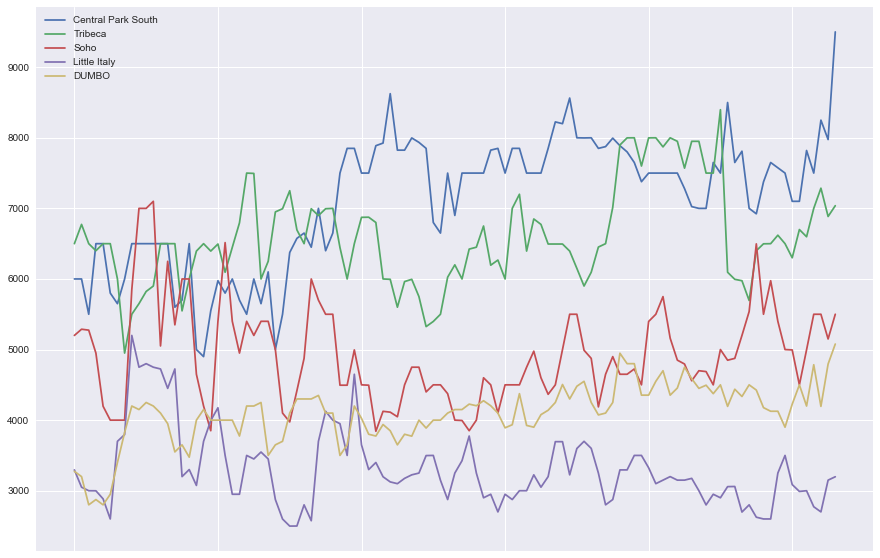

In [97]:
df = full_data
#df = df.cumsum()
plt.figure(); df.plot(figsize=(15,10)); plt.legend()

##### using `fig, ax` and a for loop to created series for each area

In [98]:
df.reset_index(inplace=True)

In [99]:
df['Date'] = df['index'].apply(pd.to_datetime)

In [100]:
df.set_index('Date', inplace=True)

In [101]:
df.drop('index', axis=1, inplace=True)

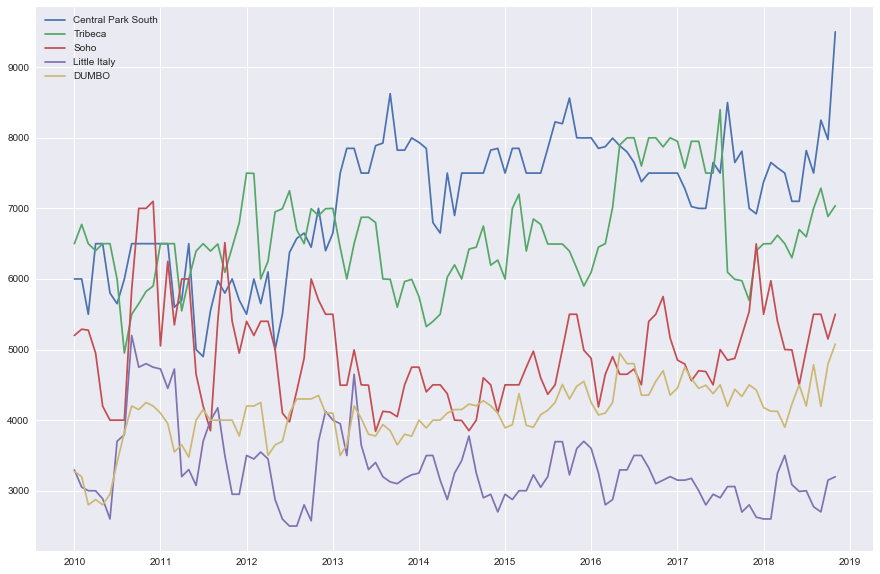

In [102]:
fig, ax = plt.subplots(figsize=(15, 10))
for c in df.columns:
    ax.plot(df[c].index, df[c].values, label=c)
ax.legend()
plt.show()

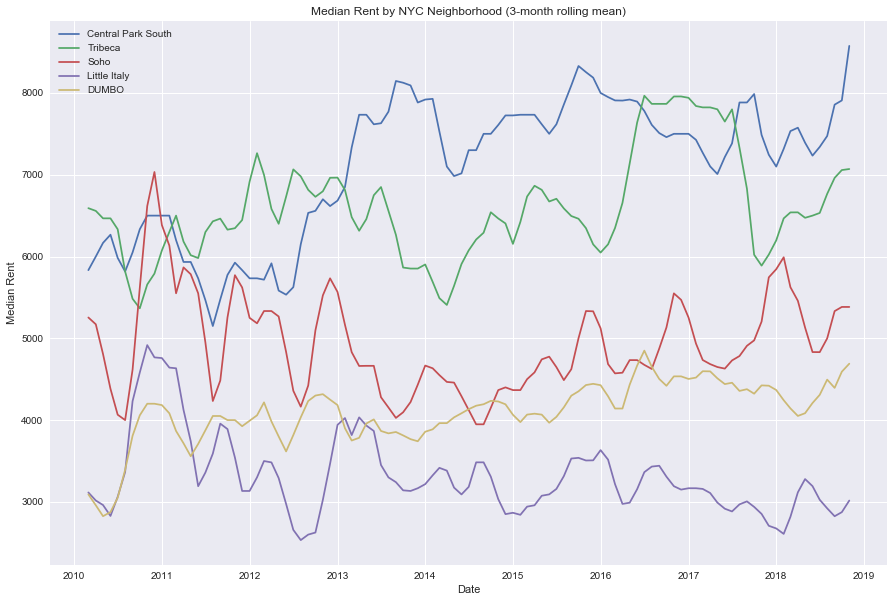

In [103]:
fig, ax = plt.subplots(figsize=(15, 10))
for c in df.columns:
    ax.plot(df[c].index, df[c].rolling(3).mean(), label=c)
ax.set_xlabel('Date')
ax.set_ylabel('Median Rent')
ax.set_title('Median Rent by NYC Neighborhood (3-month rolling mean)')
ax.legend()
plt.show()

## Produce a table summary statistics for your selected Areas

In [107]:
full_data.describe()

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,7105.383178,6602.803738,4939.887850,3311.214953,4096.831776
std,911.107958,696.883500,699.665612,549.418527,422.552073
min,4900.000000,4950.000000,3842.000000,2499.000000,2800.000000
25%,6500.000000,6095.000000,4500.000000,2950.000000,3912.500000
50%,7500.000000,6500.000000,4875.000000,3200.000000,4150.000000
75%,7825.000000,6995.000000,5400.000000,3500.000000,4342.500000
max,9500.000000,8398.000000,7100.000000,5200.000000,5078.000000


In [108]:
summary = full_data.describe()

## SERIALIZATION

## Write your summary statistics table to an Excel spreadsheet 

In [106]:
summary.to_excel("C:/Users/ystrano/Python Scripts/out_files/se_project_summary.xlsx")

## Write the full table for your selected Areas to another sheet in the same spreadsheet
## Name the sheets appropriately

In [104]:
path = "C:/Users/ystrano/Python Scripts/out_files/se_project_summary&full_data.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
summary.to_excel(writer, sheet_name = 'summary')
full_data.to_excel(writer, sheet_name = 'full_data')
writer.save()
writer.close()

## Are there any other data formats that could be useful to write data to (no need to actually do anything)? Why?

- summary tab: could drop a four or six decimal points in the mean and std rows
- full_data tab: Data column is a datetime converted from string, could get rid of the time and just keep date

# --------------------------------------------------------------------------------------------

# notes on modelling

As for the modeling, here are a couple of general concepts that it could be good to think through:
- What am I trying to predict?
- What kind of data do I have to help me make those predictions?
- Is there any model that fits this situation particularly well?
- Bias vs. variance
  - (https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)
  - (https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
  - (http://scott.fortmann-roe.com/docs/BiasVariance.html)
- Computational complexity
- Interpretability


If you can come to an understanding of where you're at with regard to each of these pieces, you're in good shape to start modeling.

# 3. MODELING

### 3. Modeling

##### Rent prediction

- What type of model would you use to predict, for one of your selected Areas, its median rent for 2018-05? Why?
- What kind of pre-treatment might you perform to help set the stage for modeling? Why, or why might you not do anything?
- Go ahead and develop a model to predict that next median rent value. How are you training the model, and how are you evaluating its performance?
- Predict values for 2018-05. Now that you have that value, predict values for the following June and July as well.
- Visualize your predicted data. How does it look?
- Provide quantitative measures of performance

## RENT PREDICTION

## drop months > 2018-04 so we can predict 2018-05 etc.

In [164]:
full_data.head()

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO
2010-01,6000.0,6500.0,5200.0,3295.0,3275.0
2010-02,6000.0,6773.0,5288.0,3050.0,3200.0
2010-03,5500.0,6500.0,5275.0,3000.0,2800.0
2010-04,6500.0,6400.0,4950.0,2999.0,2875.0
2010-05,6500.0,6500.0,4197.0,2885.0,2800.0


In [158]:
full_data.tail(10)

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO
2018-02,7650.0,6500.0,5975.0,2600.0,4126.0
2018-03,7575.0,6620.0,5400.0,3250.0,4126.0
2018-04,7500.0,6500.0,5000.0,3500.0,3900.0
2018-05,7100.0,6300.0,4995.0,3087.0,4226.0
2018-06,7100.0,6700.0,4500.0,2990.0,4500.0
2018-07,7820.0,6598.0,4997.0,3000.0,4200.0
2018-08,7500.0,7000.0,5500.0,2773.0,4785.0
2018-09,8250.0,7286.0,5500.0,2700.0,4195.0
2018-10,7975.0,6885.0,5150.0,3150.0,4795.0
2018-11,9500.0,7038.0,5500.0,3198.0,5078.0


In [159]:
len(full_data) - 6

101

In [165]:
model_data = full_data.iloc[:101,:].copy()

In [168]:
model_data.tail()

areaName,Central Park South,Tribeca,Soho,Little Italy,DUMBO
2018-01,7375.0,6498.0,5500.0,2600.0,4177.0
2018-02,7650.0,6500.0,5975.0,2600.0,4126.0
2018-03,7575.0,6620.0,5400.0,3250.0,4126.0
2018-04,7500.0,6500.0,5000.0,3500.0,3900.0
2018-05,7100.0,6300.0,4995.0,3087.0,4226.0
